# TSP
For this, we are experimenting with all of the different parameters for the MIMIC Algorithm. 

This will then be compared to the other 3 algorithms on a basis of:
1. wall clock time
2. differing problem sizes
3. number of function calls per iteration.

In [7]:
import mlrose_hiive
from mlrose_hiive import QueensGenerator, FlipFlopGenerator, TSPGenerator
from mlrose_hiive import SARunner, RHCRunner, MIMICRunner, GARunner
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
import time
import seaborn as sb

In [9]:
SIZE = 50
results = {}
SEED = 2

In [10]:
problem = TSPGenerator().generate(SEED, SIZE)

## MIMIC Tuning

#### Pop Size

Time 2.9132444858551025
Score 5367.774084446048
Value [35  0  5 32  7 38 12 15 21 43 24 22 40 10 23 42 44 47 19 25 28 41 11 29
  8 26 49  6 13 14 34 45 37 30 36  1 31 18 20  4 39 27 17 48  9 33 46  2
 16  3]
Time 4.004554510116577
Score 5367.774084446048
Value [35  0  5 32  7 38 12 15 21 43 24 22 40 10 23 42 44 47 19 25 28 41 11 29
  8 26 49  6 13 14 34 45 37 30 36  1 31 18 20  4 39 27 17 48  9 33 46  2
 16  3]
Time 4.990566253662109
Score 5367.774084446048
Value [35  0  5 32  7 38 12 15 21 43 24 22 40 10 23 42 44 47 19 25 28 41 11 29
  8 26 49  6 13 14 34 45 37 30 36  1 31 18 20  4 39 27 17 48  9 33 46  2
 16  3]
Time 11.156423568725586
Score 4817.081684982832
Value [30 26 17  9  4 12 39 23  6 49 43 28 27  8 25  3 16  5 38 35  1 34 22 42
 15  0 18 21 46 10 37 14 20 45 41 32 44 40 13 47  7 31 48  2 24 19 11 33
 29 36]
Time 18.68269920349121
Score 4360.752172412907
Value [49 38 37 17 36  7 12 46 27 32 41  8 16 20 29 30  2 43  6 24 48 45  4  1
  5 47 22 21 39 44 11 13 26 34 28 10  3 40 3

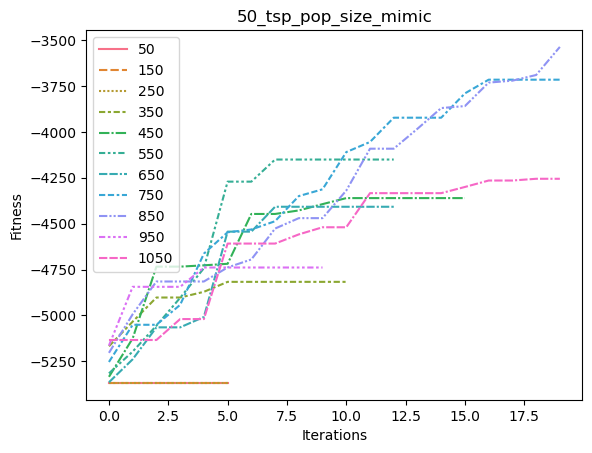

In [65]:
name = f'{SIZE}_tsp_pop_size_mimic'
plot_df = pd.DataFrame(index=range(20))

for param in np.arange(50, 1051, 100):
    start = time.time()
    fitness_curve = mlrose_hiive.mimic(
        problem,
        pop_size=int(param),
        max_attempts=5,
        curve=True,
        random_state=SEED
    )
    print("Time", time.time() - start)
    print("Score", fitness_curve[1])
    print("Value", fitness_curve[0])
    plot_df[param] = pd.Series([-x[0] for x in fitness_curve[2]])

plot = sb.lineplot(data=plot_df)
plot.set(xlabel='Iterations', ylabel='Fitness', title=name);
plt.savefig(f'{name}.png')

#### Keep Percentage

Time 12.992146492004395
Score 5367.774084446048
Value [35  0  5 32  7 38 12 15 21 43 24 22 40 10 23 42 44 47 19 25 28 41 11 29
  8 26 49  6 13 14 34 45 37 30 36  1 31 18 20  4 39 27 17 48  9 33 46  2
 16  3]
Time 23.798296213150024
Score 4264.229401423283
Value [ 9 31 12 46 18 20  1  4  7 34 38 17 33 15 22  3 25 16 13  2 14 11 10 19
 24 28 30 37 41  0  8 39 49  6 29 45 23 21 42 40 47 35  5 44 48 36 32 43
 27 26]
Time 58.19988393783569
Score 3985.227481543476
Value [49  0 18 30 29  9  1  4 42 48 19 11 14 41 22 26 27  6 24 43 23 16 44 25
 28 15 13 47 12 21 33 38 31 34 45 17 37  7 36 20 35 40  5  3  8 32 10  2
 39 46]
Time 24.092939376831055
Score 4884.60238932138
Value [ 9 17 45 28 21 38 24 29 41  2 46  8 48  5 14  0 10 18 15 44 13 40 43 27
 49 39  1  7  4 12 30  6 33 47 22 16  3 19 31 36 35 20 42 26 34 25 11 32
 23 37]
Time 26.261547803878784
Score 5186.689934753843
Value [ 8 17 30  7 12 36 22 26 37 21 23  2 48 45 42 15 28 35 18  0 44  5 40 47
 38  1 34 16 10 29 24 33  6 43 39 11 14 41 

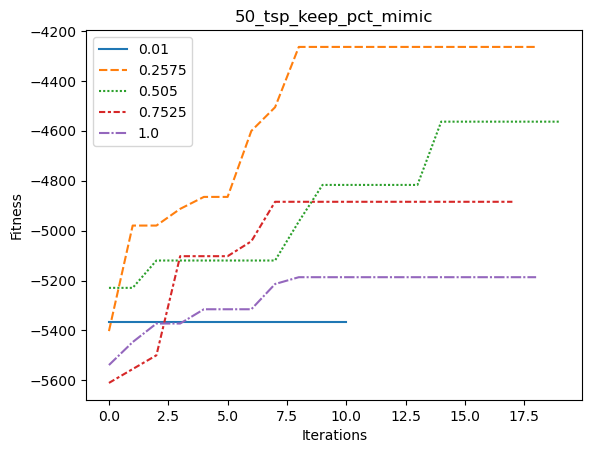

In [66]:
name = f'{SIZE}_tsp_keep_pct_mimic'
plot_df = pd.DataFrame(index=range(20))

for param in np.linspace(.01, 1, num=5):
    start = time.time()
    fitness_curve = mlrose_hiive.mimic(
        problem,
        pop_size=500,
        keep_pct=param,
        max_attempts=10,
        curve=True,
        random_state=SEED
    )
    print("Time", time.time() - start)
    print("Score", fitness_curve[1])
    print("Value", fitness_curve[0])
    plot_df[param] = pd.Series([-x[0] for x in fitness_curve[2]])

plot = sb.lineplot(data=plot_df)
plot.set(xlabel='Iterations', ylabel='Fitness', title=name);
plt.savefig(f'{name}.png')

## RHC, SA, GA, and MIMIC

In [59]:
SIZE=20
results = {}

In [60]:
problem = TSPGenerator().generate(SEED, SIZE)
name = f'{SIZE}tsp_rhc'
results[name] = {}
start = time.time()
results[name]['fitness'] = mlrose_hiive.random_hill_climb(
    problem, 
    max_attempts=100, 
    curve=True,
    random_state=SEED,
    restarts=50
)
results[name]['time'] = time.time() - start

In [61]:
name = f'{SIZE}tsp_sa'
problem = TSPGenerator().generate(SEED, SIZE)
results[name] = {}
start = time.time()
results[name]['fitness'] = mlrose_hiive.simulated_annealing(    
    problem, 
    max_attempts=30, 
    curve=True,
    random_state=SEED
)
results[name]['time'] = time.time() - start

In [62]:
name = f'{SIZE}tsp_ga'
problem = TSPGenerator().generate(SEED, SIZE)
results[name] = {}
start = time.time()
results[name]['fitness'] = mlrose_hiive.genetic_alg(
    problem,
    pop_size=1000,
    pop_breed_percent=.5,
    elite_dreg_ratio=.95,
    mutation_prob=0,
    max_attempts=10,
    curve=True,
    random_state=SEED
)
results[name]['time'] = time.time() - start

In [63]:
name = f'{SIZE}tsp_mimic'
problem = TSPGenerator().generate(SEED, SIZE)
results[name] = {}
start = time.time()
results[name]['fitness'] = mlrose_hiive.mimic(
    problem,
    pop_size=1000,
    keep_pct=.25,
    max_attempts=10,
    curve=True,
    random_state=SEED
)
results[name]['time'] = time.time() - start

In [64]:
df = pd.DataFrame()

In [65]:
df['rhc'] = pd.Series([-x[0] for x in results[f'{SIZE}tsp_rhc']['fitness'][2]])
df['sa'] =  pd.Series([-x[0] for x in results[f'{SIZE}tsp_sa']['fitness'][2]])
df['ga'] =  pd.Series([-x[0] for x in results[f'{SIZE}tsp_ga']['fitness'][2]])
df['mimic'] =  pd.Series([-x[0] for x in results[f'{SIZE}tsp_mimic']['fitness'][2]])

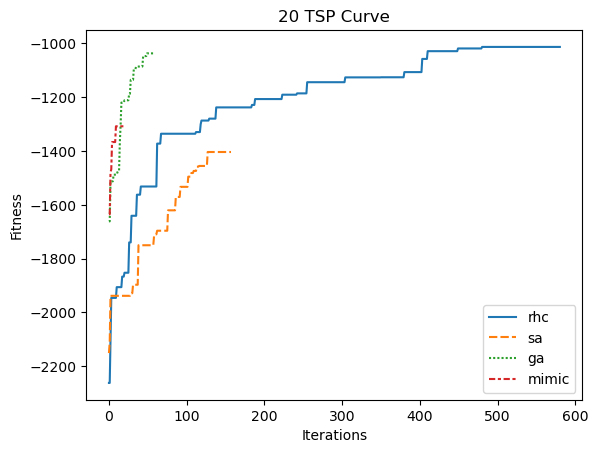

In [66]:
plot = sb.lineplot(data=df)
plot.set(xlabel='Iterations', ylabel='Fitness', title=f'{SIZE} TSP Curve');
plt.savefig(f'{SIZE}tsp_curve.png')

In [67]:
for key in results:
    print('Algorithm', key)
    print('Value', results[key]['fitness'][0])
    print('Score', results[key]['fitness'][1])
    print('Evals', results[key]['fitness'][2][-1][-1])
    print('Iterations', len(results[key]['fitness'][2]))
    print('Average Evals Per Iteration', results[key]['fitness'][2][-1][-1] / len(results[key]['fitness'][2]))
    print('Time', results[key]['time'])
    print()

Algorithm 20tsp_rhc
Value [ 2  6 11 14  0 19 12  4  3  7 15  1  5 17  9 13 16  8 10 18]
Score 1012.8071344525539
Evals 12153.0
Iterations 581
Average Evals Per Iteration 20.91738382099828
Time 0.7606899738311768

Algorithm 20tsp_sa
Value [ 1  4 12 19  7 15 17 16 13  9  0  8 14  6 11  2 18 10  3  5]
Score 1403.6639123861323
Evals 175.0
Iterations 158
Average Evals Per Iteration 1.1075949367088607
Time 0.008007049560546875

Algorithm 20tsp_ga
Value [19 12  7  3  4  1  5 15 17  9 13 16  8  0 10 18 14  2  6 11]
Score 1036.7456314033147
Evals 61075.0
Iterations 60
Average Evals Per Iteration 1017.9166666666666
Time 3.6987547874450684

Algorithm 20tsp_mimic
Value [ 2  0 10 19 15 12  7  3  4 17  9  1  5  8 16 13 11 14 18  6]
Score 1307.9761704601747
Evals 21025.0
Iterations 20
Average Evals Per Iteration 1051.25
Time 12.13601040840149

